## 머신러닝으로 데이터 분석하기 : SVM
---
### 사용 패키지 준비

In [53]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 데이터 불러오기

In [54]:
data = pd.read_csv('C:/Projects/data.csv', encoding = 'cp949')
data = data.apply(pd.to_numeric, errors='coerce').fillna(0)
data

C:\Users\yeji4\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,전운량,최저운고,강수량,기온,시정,풍향,풍속,현황
0,7,35,0,7.6,1000.0,20,4,0
1,6,35,0,6.8,1000.0,19,5,0
2,3,35,0,5.6,1000.0,18,6,0
3,3,35,0,5.6,1000.0,18,6,0
4,3,35,0,5.6,1000.0,18,6,0
...,...,...,...,...,...,...,...,...
143239,7,5,0,2.2,500.0,31,14,1
143240,7,5,0,2.2,500.0,31,14,1
143241,7,5,0,2.2,500.0,31,14,1
143242,7,10,0,2.5,500.0,33,14,1


### 학습 데이터, 타겟 데이터 지정하기
* 학습 데이터는 pandas의 DataFrame 타입으로 불러왔기 때문에 numpy 객체로 변환
* 학습 데이터의 컬럼 : 풍향, 풍속, 시정, 전운량, 최저운고, 기온, 강수량
* 타겟 데이터(예측할 데이터) : 현황

In [55]:
# 학습 데이터 
train_data = data[['풍향', '풍속', '시정', '전운량','최저운고', '기온', '강수량']].to_numpy()
# 타겟 데이터 
target = data['현황'].to_numpy()

### 테스트 셋 분리하기
* train_test_split 사용 : 학습 데이터 셋, 테스트 데이터 셋 분리
* test_size : 30%

In [56]:
train_input, test_input, train_target, test_target = train_test_split(train_data, target, test_size = 0.3)

### 모델 학습시키기
* gamma : 결정 경계의 곡률(0.01로 설정)

In [57]:
model = SVC(gamma=0.01).fit(train_input, train_target)

### 모델 성능평가
---
#### 정확도

In [59]:
print("훈련 세트 정확도: {:.7f}".format(model.score(train_input, train_target)))
print("테스트 세트 정확도: {:.7f}".format(model.score(test_input, test_target)))

훈련 세트 정확도: 0.9402314
테스트 세트 정확도: 0.9387769


#### 학습된 모델로 예측

In [60]:
y_pred = model.predict(train_input)

#### 성능평가를 위해 혼동행렬 확인

In [65]:
print(confusion_matrix(train_target, y_pred))

[[47439  4142]
 [ 1851 46838]]


#### 혼동행렬 시각화

([<matplotlib.axis.XTick at 0x244889269d0>,
 [Text(0.5, 0, 'True'), Text(1.5, 0, 'False')])

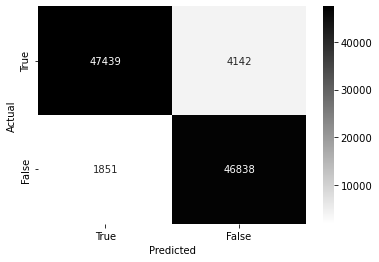

In [64]:
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

svm = {'예측값(P)' : [47439, 1851],
      '예측값(N)' : [4142, 46838]}
svm = DataFrame(svm)

sns.heatmap(svm, annot = True, fmt = 'd', cmap = 'gist_yarg')
plt.ylabel("Actual")
plt.yticks([0.5, 1.5], ['True', 'False'])
plt.xlabel('Predicted')
plt.xticks([0.5, 1.5], ['True', 'False'])

#### 성능평가를 위한 4가지 조건
* 정확도 : True를 True로 옳게 예측한 경우 + False를 False로 옳게 예측한 경우
* 정밀도 : True라고 분류한 것 중에서 실제 True인 경우
* 재현율 : 실제 True인 것 중에서 모델이 True라고 분류한 경우
* F1 score : 정밀도와 재현율의 조화평균 

In [62]:
print("정확도 : {: .2f}".format(accuracy_score(train_target, y_pred) * 100))
print("정밀도 : {: .2f}".format(precision_score(train_target, y_pred) * 100))
print("재현율 : {: .2f}".format(recall_score(train_target, y_pred) * 100))
print("F1-score : {: .2f}".format(f1_score(train_target, y_pred) * 100))

정확도 :  94.02
정밀도 :  91.88
재현율 :  96.20
F1-score :  93.99
